In [1]:
#load important libraries
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data
data=pd.read_csv('houses.csv')

In [3]:
#view data info to define data types and null values and column names
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
#check null values
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
#fill all null values to zero
data.fillna(value=0,inplace=True)

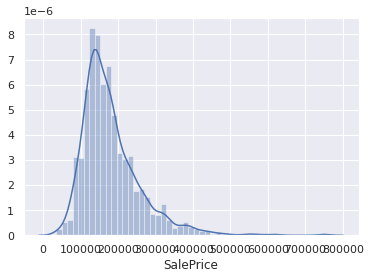

In [6]:
#plot distribution to Sale Price column
sns.distplot(data['SalePrice'])

In [7]:
#perform log over the SalePrice column
log_price=np.log(data['SalePrice'])
data['log_sale']=log_price

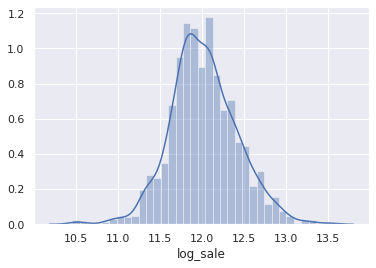

In [8]:
#plot log distribution of sale price
sns.distplot(data['log_sale'])

In [9]:
#remove outliers from data 
q=data['log_sale'].quantile(0.99)
data=data[data['log_sale']<q]
data.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,log_sale
count,1445.000000,1445.000000,1445,1445.000000,1445.000000,1445,1445.0,1445,1445,1445,...,1445.0,1445.0,1445.0,1445.000000,1445.000000,1445.000000,1445,1445,1445.000000,1445.000000
unique,NaN,NaN,5,NaN,NaN,2,3.0,4,4,2,...,4.0,5.0,5.0,NaN,NaN,NaN,9,6,NaN,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,0.0,Reg,Lvl,AllPub,...,0.0,0.0,0.0,NaN,NaN,NaN,WD,Normal,NaN,NaN
freq,NaN,NaN,1137,NaN,NaN,1439,1354.0,920,1297,1444,...,1439.0,1166.0,1391.0,NaN,NaN,NaN,1260,1191,NaN,NaN
mean,729.842215,56.993080,NaN,57.284429,10423.696886,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,43.940484,6.328720,2007.815225,NaN,NaN,177082.510035,12.011792
std,422.187530,42.460752,NaN,34.500252,9929.978538,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,498.673281,2.702832,1.326709,NaN,NaN,69614.603756,0.382494
min,1.000000,20.000000,NaN,0.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000,10.460242
25%,364.000000,20.000000,NaN,41.000000,7500.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129900.000000,11.774520
50%,729.000000,50.000000,NaN,63.000000,9430.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,162000.000000,11.995352
75%,1095.000000,70.000000,NaN,78.000000,11478.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,212000.000000,12.264342


In [10]:
#load int and float columns (numeric fields) for further analysis
data.select_dtypes(include=['float','int']).columns.values

array(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'log_sale'], dtype=object)

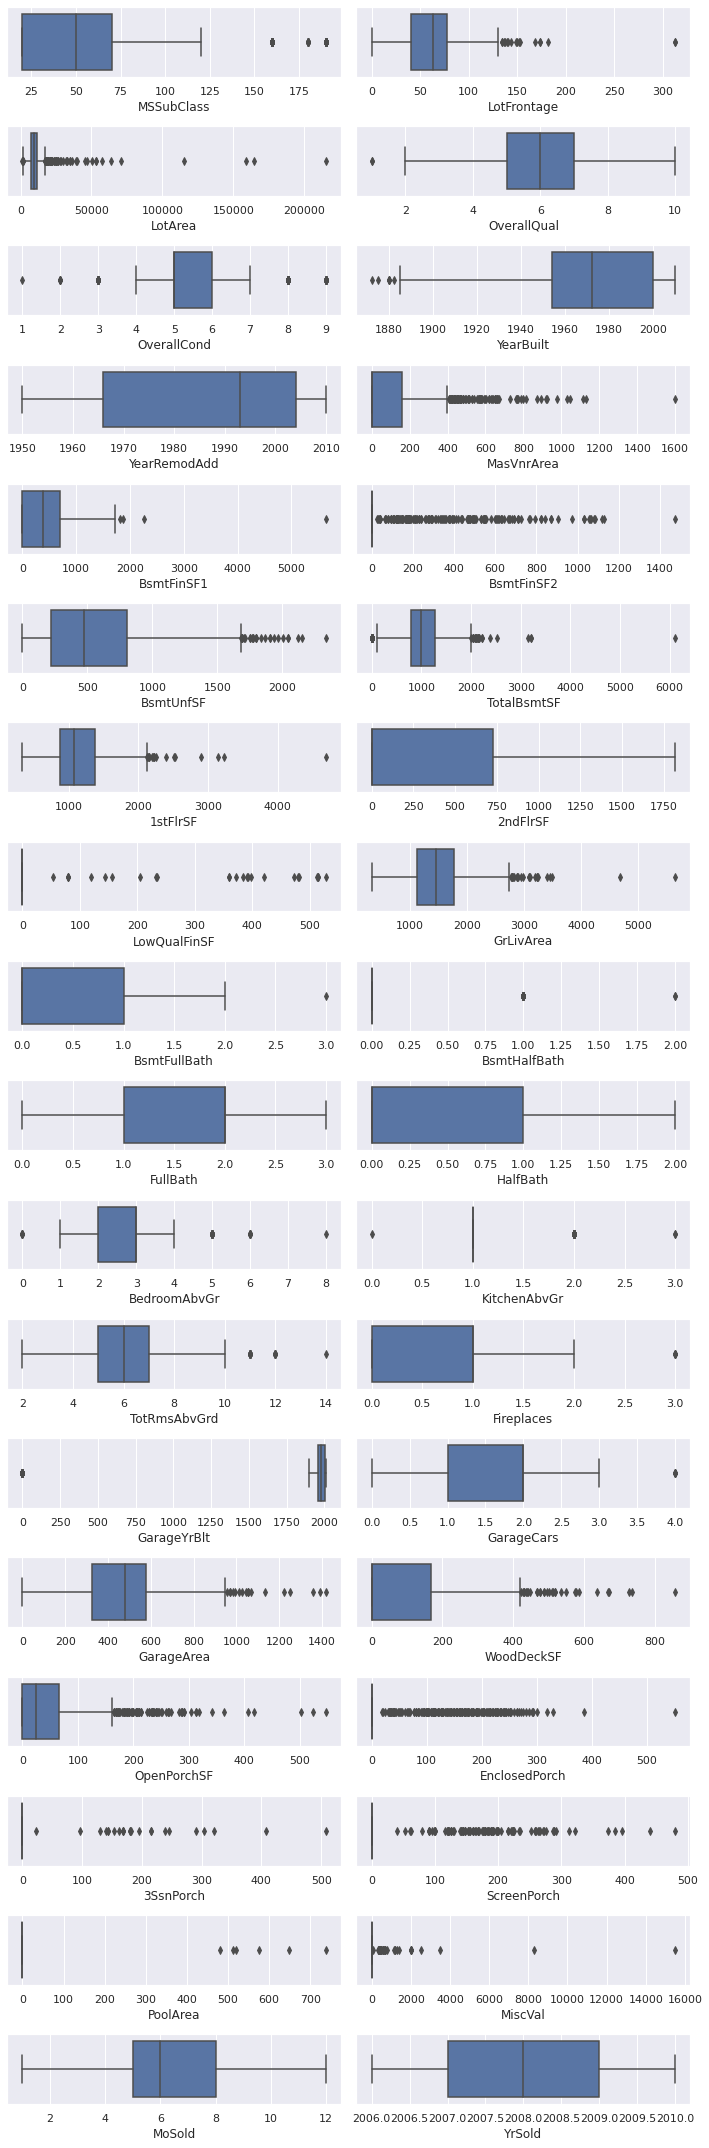

In [11]:
#plot boxplot to visualize outliers in numeric data
varlist = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']
fig, axs = plt.subplots(18,2, figsize = (10,30))
j=0
index=0
for i,val in enumerate(varlist):
    sns.boxplot(data[val], ax = axs[index,j])
    if j==0:
        j=1
    else:
        j=0
        index=index+1

plt.tight_layout()

In [12]:
#remove outliers from data
for x in varlist:
    percentiles = data[x].quantile([0.05,0.95]).values
    data[x][data[x] <= percentiles[0]] = percentiles[0]
    data[x][data[x] >= percentiles[1]] = percentiles[1]

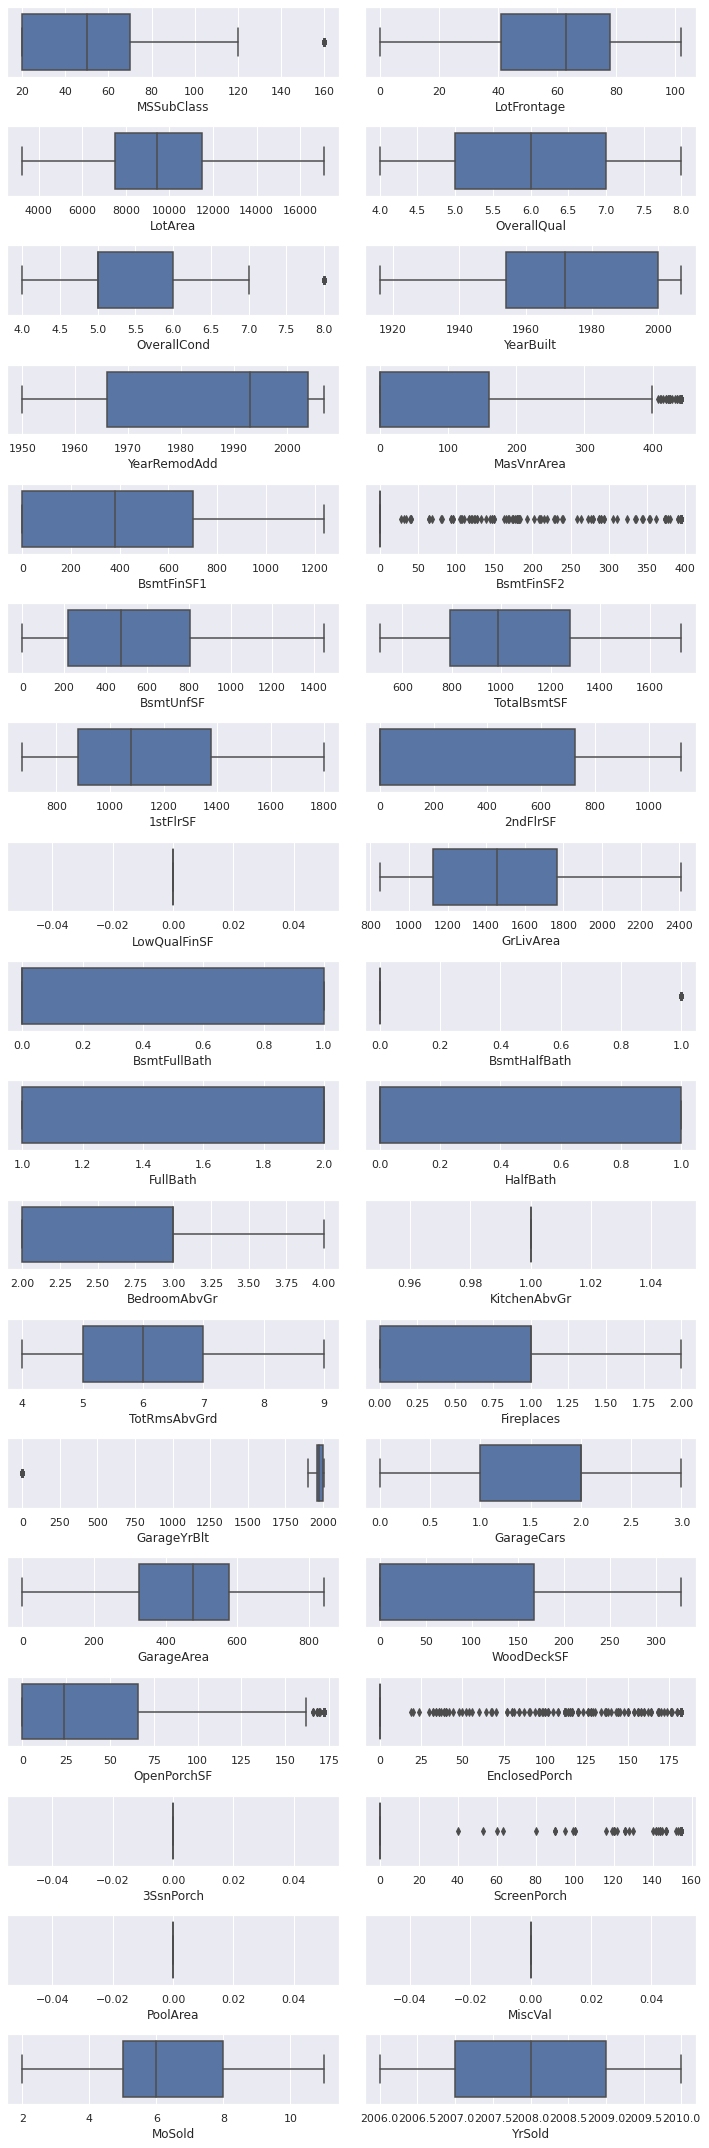

In [13]:
#plot boxplot to visualize numeric data after removing outliers
fig, axs = plt.subplots(18,2, figsize = (10,30))
j=0
index=0
for i,val in enumerate(varlist):
    sns.boxplot(data[val], ax = axs[index,j])
    if j==0:
        j=1
    else:
        j=0
        index=index+1
plt.tight_layout()

In [14]:
#view all columns to further feature analysis
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [15]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,log_sale
count,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,...,1445.000000,1445.000000,1445.0,1445.000000,1445.0,1445.0,1445.000000,1445.000000,1445.000000,1445.000000
mean,729.842215,56.231834,56.027682,9606.753633,6.047059,5.589619,1971.519031,1984.604844,89.069896,424.012042,...,42.102422,19.466574,0.0,11.001661,0.0,0.0,6.326644,2007.815225,177082.510035,12.011792
std,422.187530,40.298036,31.286994,3408.960435,1.215322,1.017045,28.810763,20.580619,136.500647,403.767541,...,52.463830,50.971146,0.0,38.586406,0.0,0.0,2.551115,1.326709,69614.603756,0.382494
min,1.000000,20.000000,0.000000,3247.200000,4.000000,4.000000,1916.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,2.000000,2006.000000,34900.000000,10.460242
25%,364.000000,20.000000,41.000000,7500.000000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,5.000000,2007.000000,129900.000000,11.774520
50%,729.000000,50.000000,63.000000,9430.000000,6.000000,5.000000,1972.000000,1993.000000,0.000000,380.000000,...,24.000000,0.000000,0.0,0.000000,0.0,0.0,6.000000,2008.000000,162000.000000,11.995352
75%,1095.000000,70.000000,78.000000,11478.000000,7.000000,6.000000,2000.000000,2004.000000,160.000000,702.000000,...,66.000000,0.000000,0.0,0.000000,0.0,0.0,8.000000,2009.000000,212000.000000,12.264342
max,1460.000000,160.000000,102.000000,17091.800000,8.000000,8.000000,2007.000000,2007.000000,442.000000,1237.800000,...,172.000000,182.400000,0.0,154.800000,0.0,0.0,11.000000,2010.000000,440000.000000,12.994530


In [16]:
#Scatter each feature to log of sale price to view relation between each numeric feature regarded to the log price
#before ploting each feature, I check null values using data[column_name].isnull().sum()
#then replace column values of null value to zeros for numeric features only 
#using data[column_name].fillna(value=0,inplace=True)
data['LotFrontage'].fillna(value=0,inplace=True)


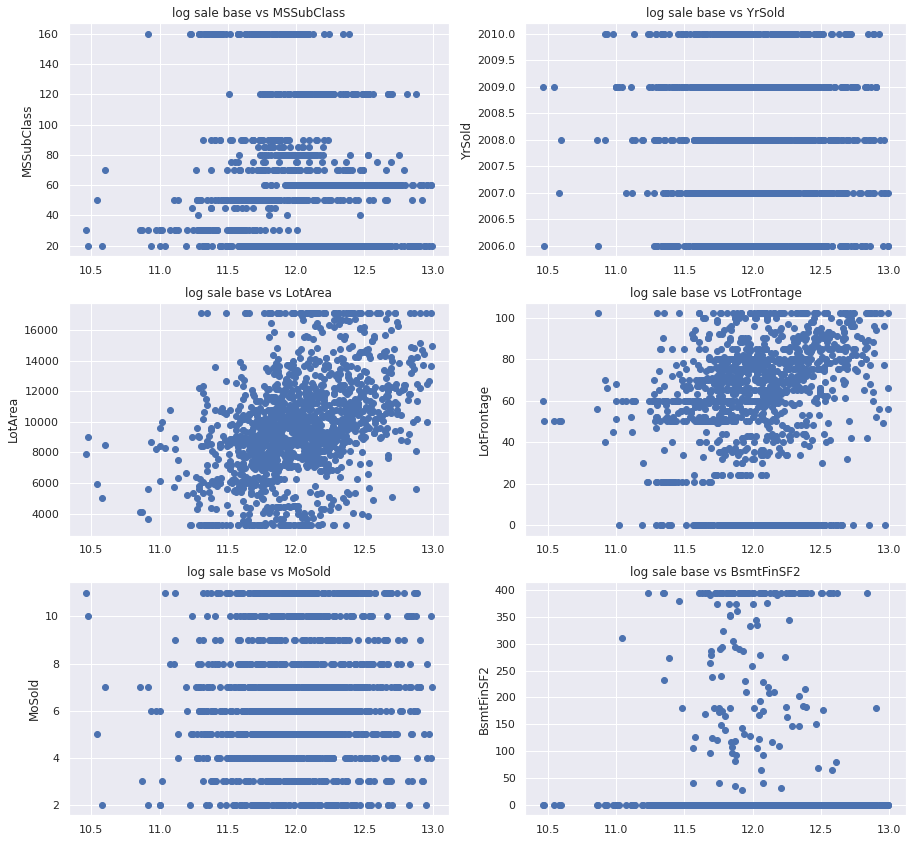

In [17]:
def scatter_feature(x,fig):
    plt.subplot(6,2,fig)
    plt.scatter(data['log_sale'],data[x])
    data[x]=data[x].astype(float)
    plt.title('log sale base vs '+ x)
    plt.ylabel(x)
  

plt.figure(figsize=(15,30))
scatter_feature('MSSubClass',1)
scatter_feature('YrSold',2)
scatter_feature('LotArea',3)
scatter_feature('LotFrontage',4)
scatter_feature('MoSold',5)
scatter_feature('BsmtFinSF2',6)
plt.show()

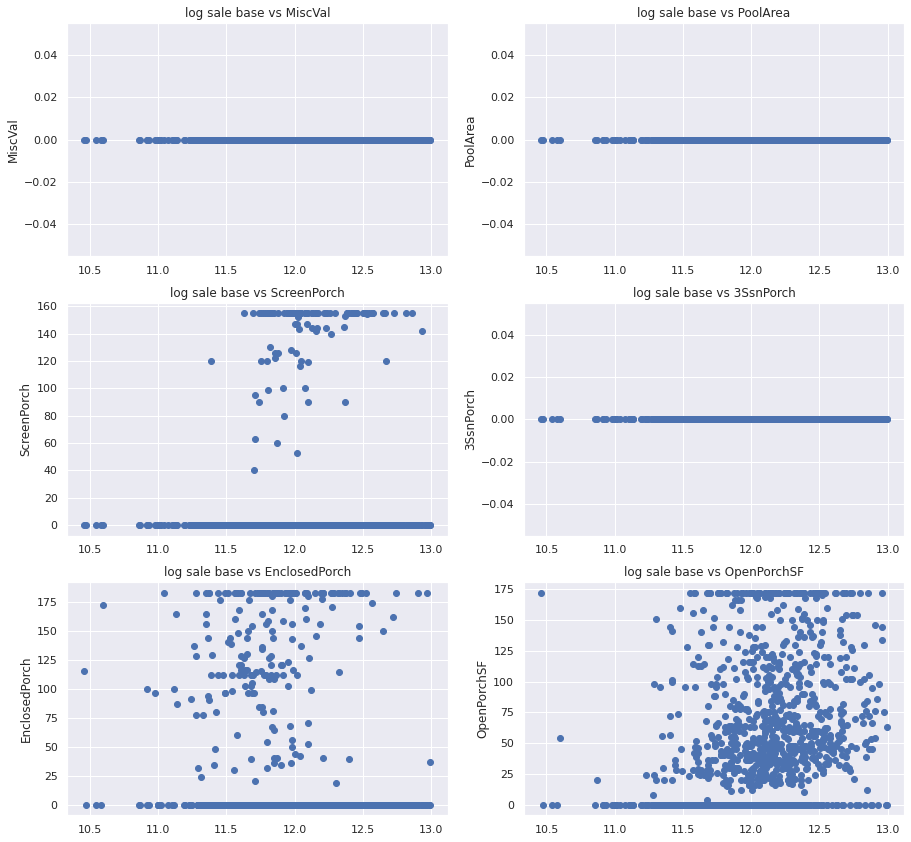

In [18]:
plt.figure(figsize=(15,30))
scatter_feature('MiscVal',1)
scatter_feature('PoolArea',2)
scatter_feature('ScreenPorch',3)
scatter_feature('3SsnPorch',4)
scatter_feature('EnclosedPorch',5)
scatter_feature('OpenPorchSF',6)
plt.show()

In [19]:
data['GarageYrBlt'].fillna(value=0,inplace=True)

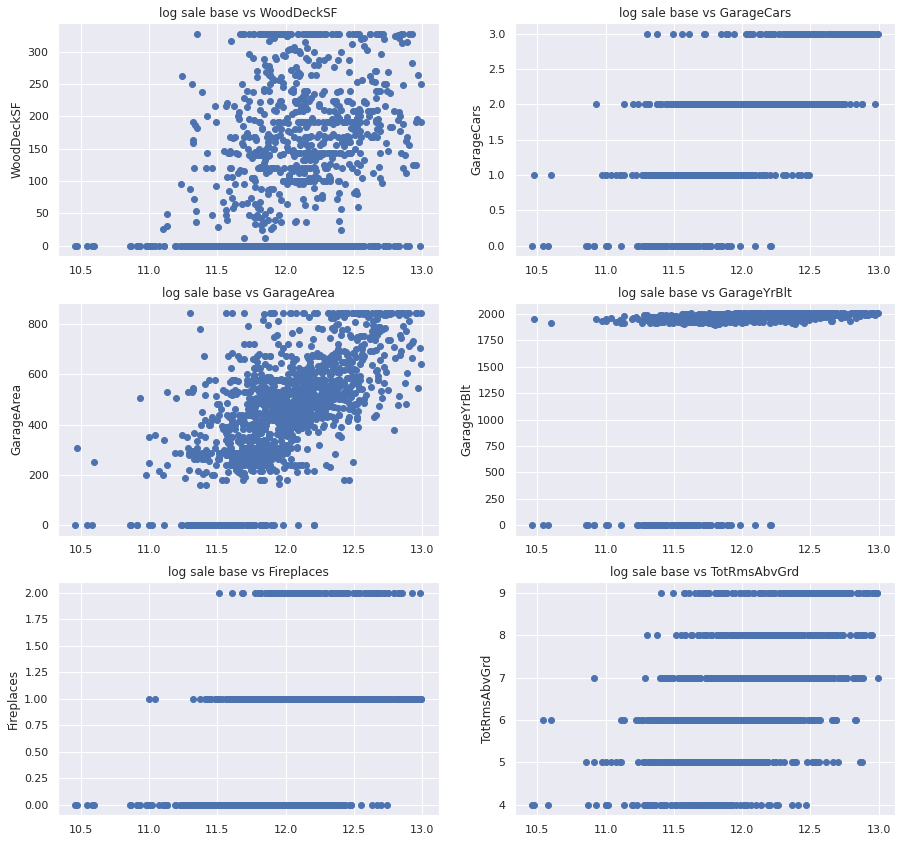

In [20]:
plt.figure(figsize=(15,30))
scatter_feature('WoodDeckSF',1)
scatter_feature('GarageCars',2)
scatter_feature('GarageArea',3)
scatter_feature('GarageYrBlt',4)
scatter_feature('Fireplaces',5)
scatter_feature('TotRmsAbvGrd',6)
plt.show()

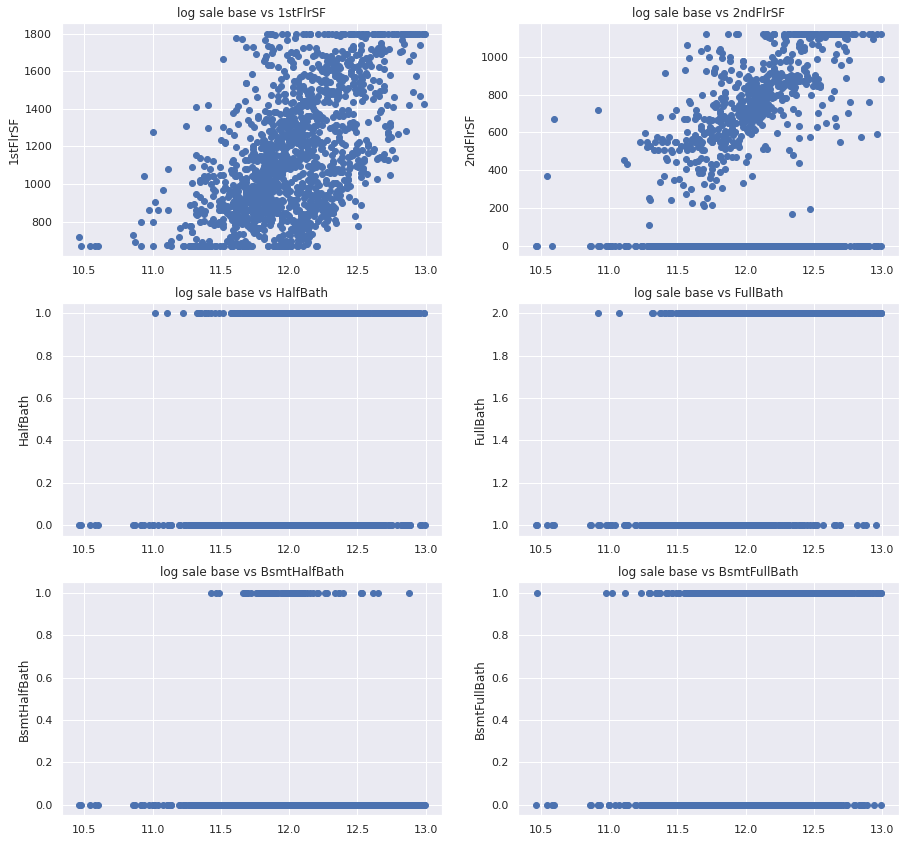

In [21]:
plt.figure(figsize=(15,30))

scatter_feature('1stFlrSF',1)
scatter_feature('2ndFlrSF',2)
scatter_feature('HalfBath',3)
scatter_feature('FullBath',4)
scatter_feature('BsmtHalfBath',5)
scatter_feature('BsmtFullBath',6)
plt.show()

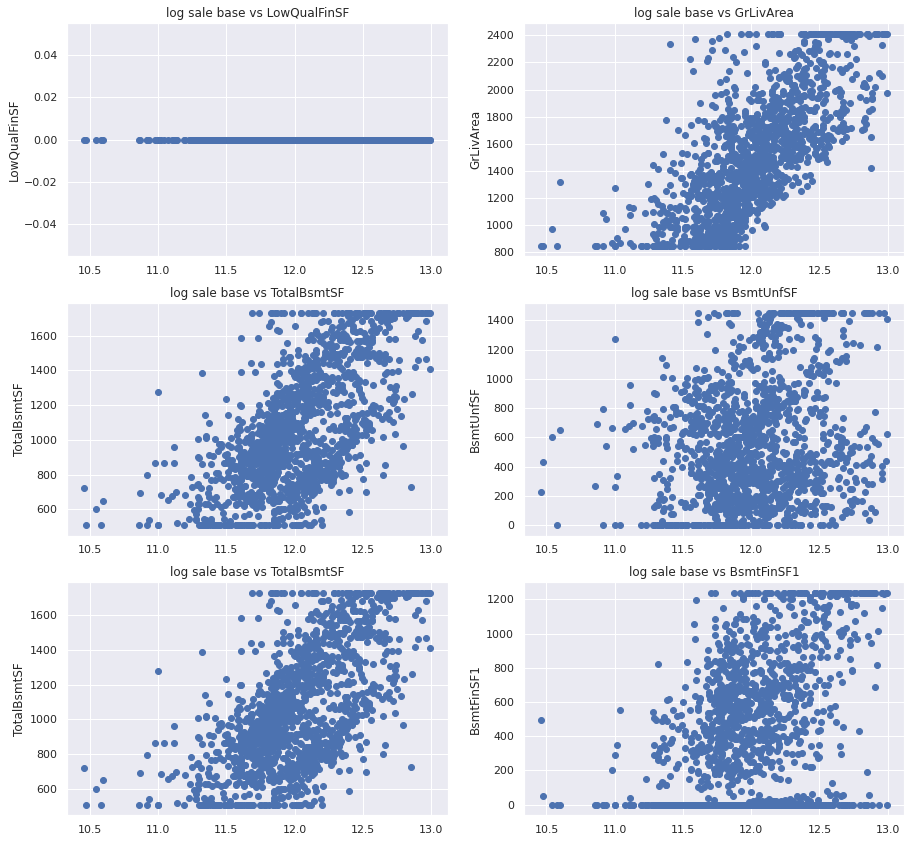

In [22]:
plt.figure(figsize=(15,30))

scatter_feature('LowQualFinSF',1)
scatter_feature('GrLivArea',2)
scatter_feature('TotalBsmtSF',3)
scatter_feature('BsmtUnfSF',4)
scatter_feature('TotalBsmtSF',5)
scatter_feature('BsmtFinSF1',6)
plt.show()

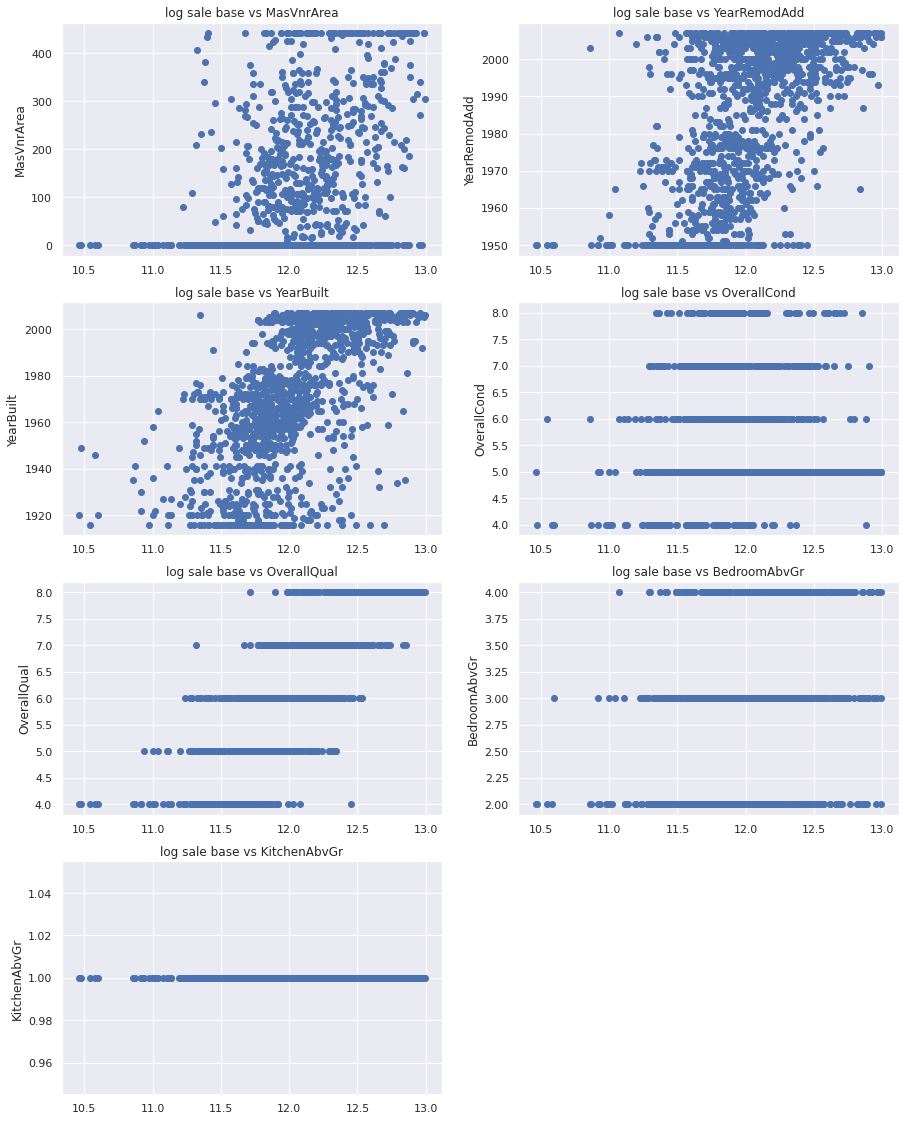

In [23]:
plt.figure(figsize=(15,30))

scatter_feature('MasVnrArea',1)
scatter_feature('YearRemodAdd',2)
scatter_feature('YearBuilt',3)
scatter_feature('OverallCond',4)
scatter_feature('OverallQual',5)
scatter_feature('BedroomAbvGr',6)
scatter_feature('KitchenAbvGr',7)
plt.show()

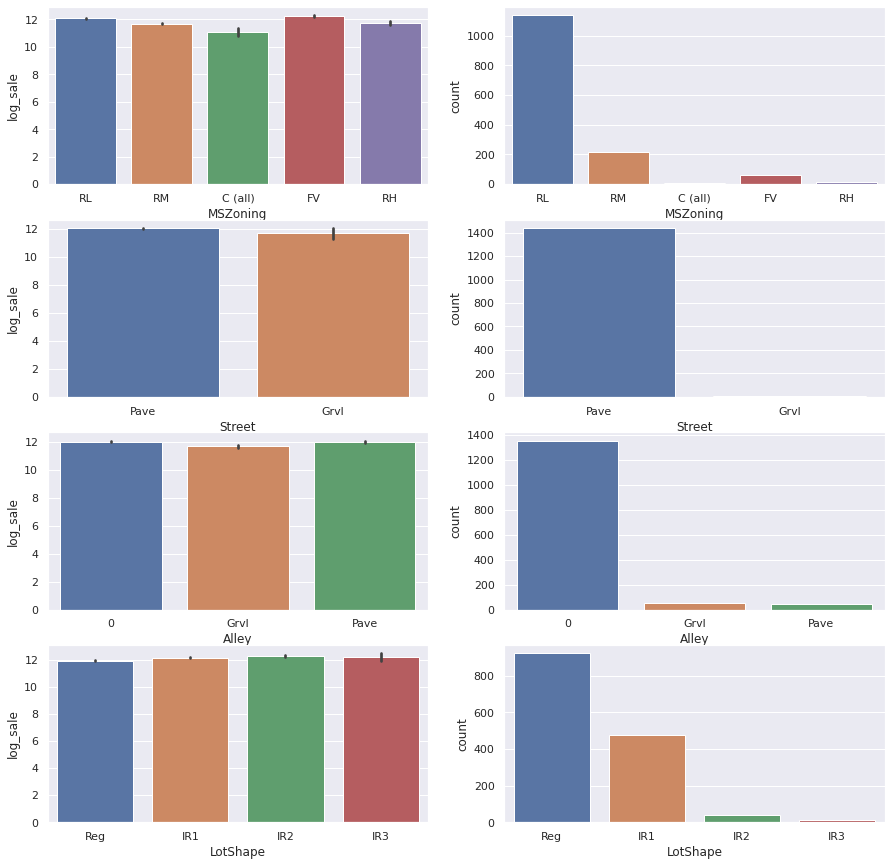

In [24]:
#visualize categorial data with respect to log sale price using bar plot
#visualize number of occurrence of each category using count plot
f, axes = plt.subplots(4, 2,figsize = (15,15))
sns.barplot(  x=data['MSZoning'], y= data['log_sale'] , ax=axes[0,0])
sns.countplot(  x=data['MSZoning'],  ax=axes[0,1])
sns.barplot(  x=data['Street'], y= data['log_sale'] , ax=axes[1,0])
sns.countplot(  x=data['Street'],  ax=axes[1,1])
sns.barplot(  x=data['Alley'], y= data['log_sale'] , ax=axes[2,0])
sns.countplot(  x=data['Alley'],  ax=axes[2,1])
sns.barplot(  x=data['LotShape'], y= data['log_sale'] , ax=axes[3,0])
sns.countplot(  x=data['LotShape'],  ax=axes[3,1])

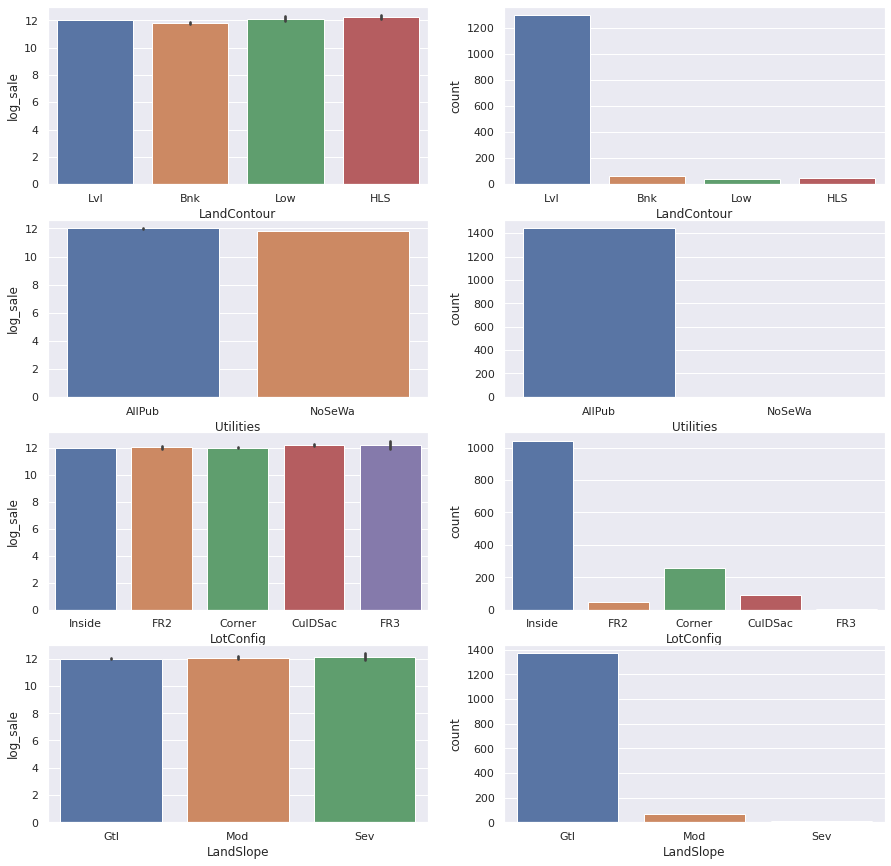

In [25]:
f, axes = plt.subplots(4, 2,figsize = (15,15))
sns.barplot(  x=data['LandContour'], y= data['log_sale'] , ax=axes[0,0])
sns.countplot(  x=data['LandContour'],  ax=axes[0,1])
sns.barplot(  x=data['Utilities'], y= data['log_sale'] , ax=axes[1,0])
sns.countplot(  x=data['Utilities'],  ax=axes[1,1])
sns.barplot(  x=data['LotConfig'], y= data['log_sale'] , ax=axes[2,0])
sns.countplot(  x=data['LotConfig'],  ax=axes[2,1])
sns.barplot(  x=data['LandSlope'], y= data['log_sale'] , ax=axes[3,0])
sns.countplot(  x=data['LandSlope'],  ax=axes[3,1])

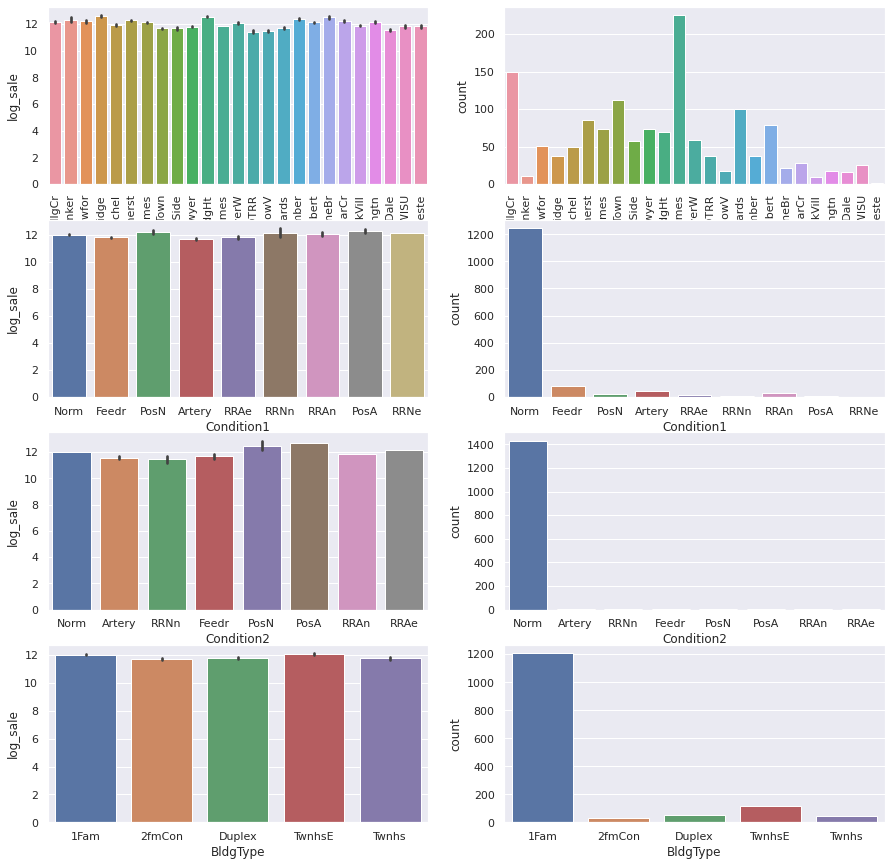

In [26]:
f, axes = plt.subplots(4, 2,figsize = (15,15))
g=sns.barplot(  x=data['Neighborhood'], y= data['log_sale'] , ax=axes[0,0])
h=sns.countplot(  x=data['Neighborhood'],  ax=axes[0,1])
g.set_xticklabels(g.get_xticklabels(),rotation=90)
h.set_xticklabels(h.get_xticklabels(),rotation=90)
sns.barplot(  x=data['Condition1'], y= data['log_sale'] , ax=axes[1,0])
sns.countplot(  x=data['Condition1'],  ax=axes[1,1])
sns.barplot(  x=data['Condition2'], y= data['log_sale'] , ax=axes[2,0])
sns.countplot(  x=data['Condition2'],  ax=axes[2,1])
sns.barplot(  x=data['BldgType'], y= data['log_sale'] , ax=axes[3,0])
sns.countplot(  x=data['BldgType'],  ax=axes[3,1])

[Text(0, 0, 'VinylSd'),
 Text(0, 0, 'MetalSd'),
 Text(0, 0, 'Wd Sdng'),
 Text(0, 0, 'HdBoard'),
 Text(0, 0, 'BrkFace'),
 Text(0, 0, 'WdShing'),
 Text(0, 0, 'CemntBd'),
 Text(0, 0, 'Plywood'),
 Text(0, 0, 'AsbShng'),
 Text(0, 0, 'Stucco'),
 Text(0, 0, 'BrkComm'),
 Text(0, 0, 'AsphShn'),
 Text(0, 0, 'Stone'),
 Text(0, 0, 'ImStucc'),
 Text(0, 0, 'CBlock')]

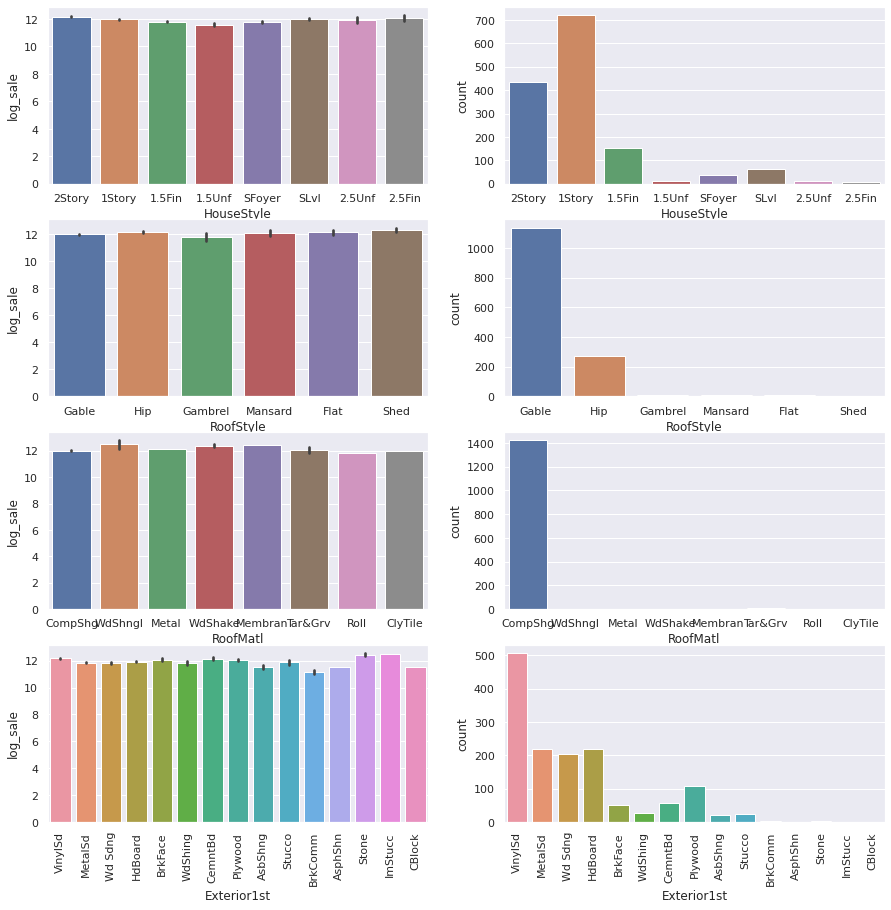

In [27]:
f, axes = plt.subplots(4, 2,figsize = (15,15))
sns.barplot(  x=data['HouseStyle'], y= data['log_sale'] , ax=axes[0,0])
sns.countplot(  x=data['HouseStyle'],  ax=axes[0,1])
sns.barplot(  x=data['RoofStyle'], y= data['log_sale'] , ax=axes[1,0])
sns.countplot(  x=data['RoofStyle'],  ax=axes[1,1])
sns.barplot(  x=data['RoofMatl'], y= data['log_sale'] , ax=axes[2,0])
sns.countplot(  x=data['RoofMatl'],  ax=axes[2,1])

g=sns.barplot(  x=data['Exterior1st'], y= data['log_sale'] , ax=axes[3,0])
h=sns.countplot(  x=data['Exterior1st'],  ax=axes[3,1])
g.set_xticklabels(g.get_xticklabels(),rotation=90)
h.set_xticklabels(h.get_xticklabels(),rotation=90)

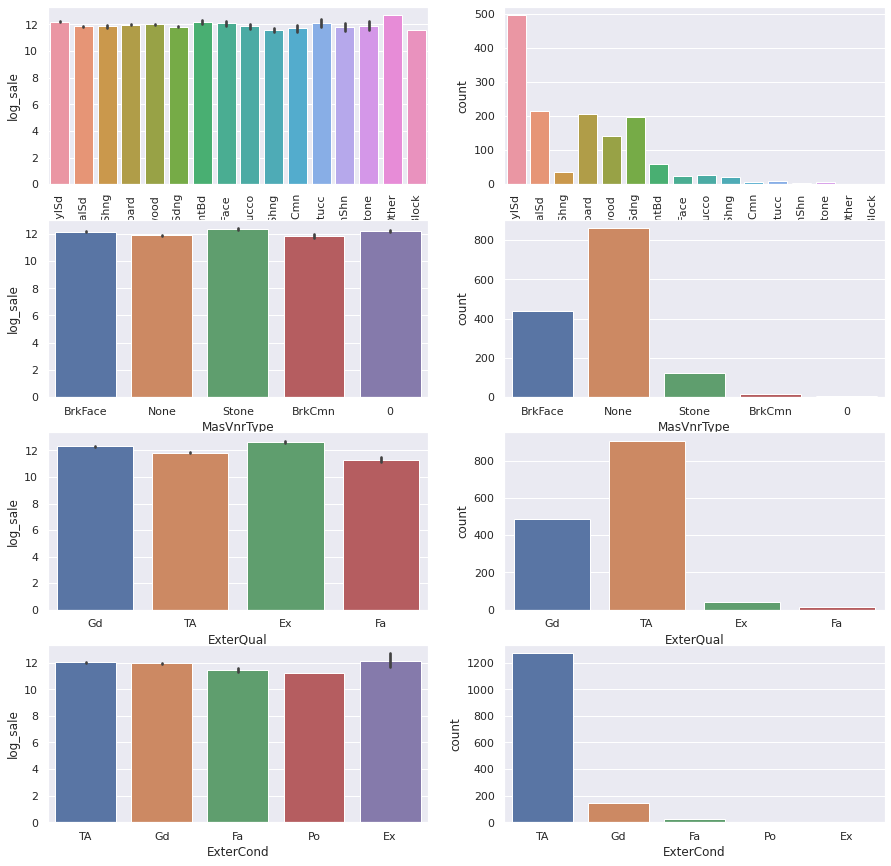

In [28]:
f, axes = plt.subplots(4, 2,figsize = (15,15))
g=sns.barplot(  x=data['Exterior2nd'], y= data['log_sale'] , ax=axes[0,0])
h=sns.countplot(  x=data['Exterior2nd'],  ax=axes[0,1])
g.set_xticklabels(g.get_xticklabels(),rotation=90)
h.set_xticklabels(h.get_xticklabels(),rotation=90)
sns.barplot(  x=data['MasVnrType'], y= data['log_sale'] , ax=axes[1,0])
sns.countplot(  x=data['MasVnrType'],  ax=axes[1,1])
sns.barplot(  x=data['ExterQual'], y= data['log_sale'] , ax=axes[2,0])
sns.countplot(  x=data['ExterQual'],  ax=axes[2,1])
sns.barplot(  x=data['ExterCond'], y= data['log_sale'] , ax=axes[3,0])
sns.countplot(  x=data['ExterCond'],  ax=axes[3,1])

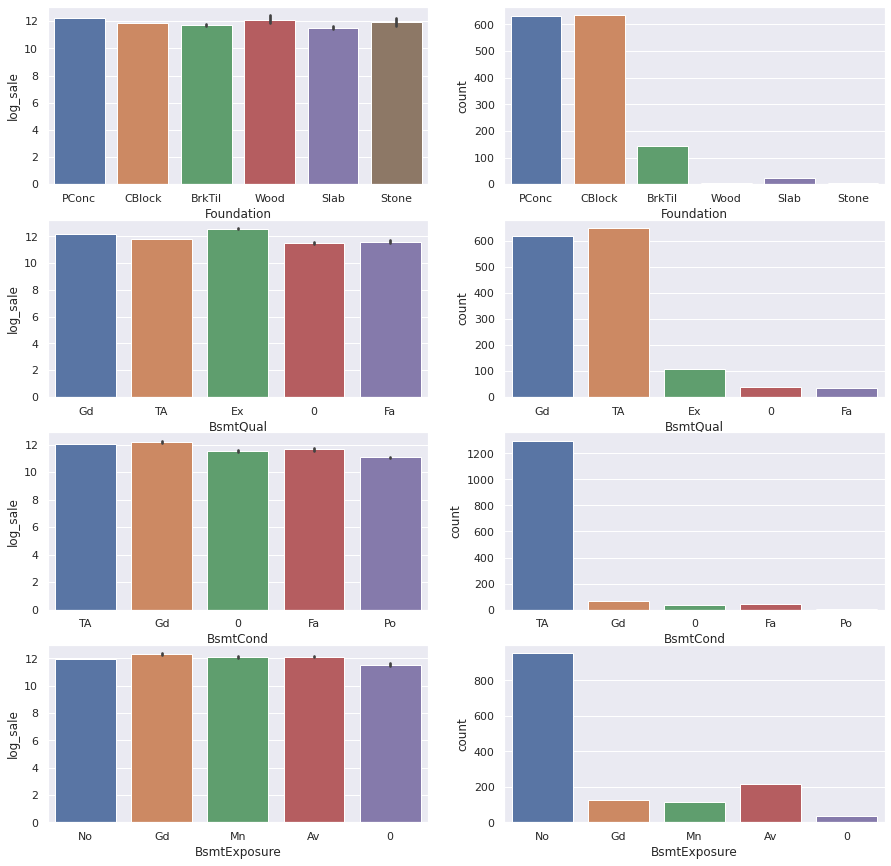

In [29]:
f, axes = plt.subplots(4, 2,figsize = (15,15))
sns.barplot(  x=data['Foundation'], y= data['log_sale'] , ax=axes[0,0])
sns.countplot(  x=data['Foundation'],  ax=axes[0,1])
sns.barplot(  x=data['BsmtQual'], y= data['log_sale'] , ax=axes[1,0])
sns.countplot(  x=data['BsmtQual'],  ax=axes[1,1])
sns.barplot(  x=data['BsmtCond'], y= data['log_sale'] , ax=axes[2,0])
sns.countplot(  x=data['BsmtCond'],  ax=axes[2,1])
sns.barplot(  x=data['BsmtExposure'], y= data['log_sale'] , ax=axes[3,0])
sns.countplot(  x=data['BsmtExposure'],  ax=axes[3,1])


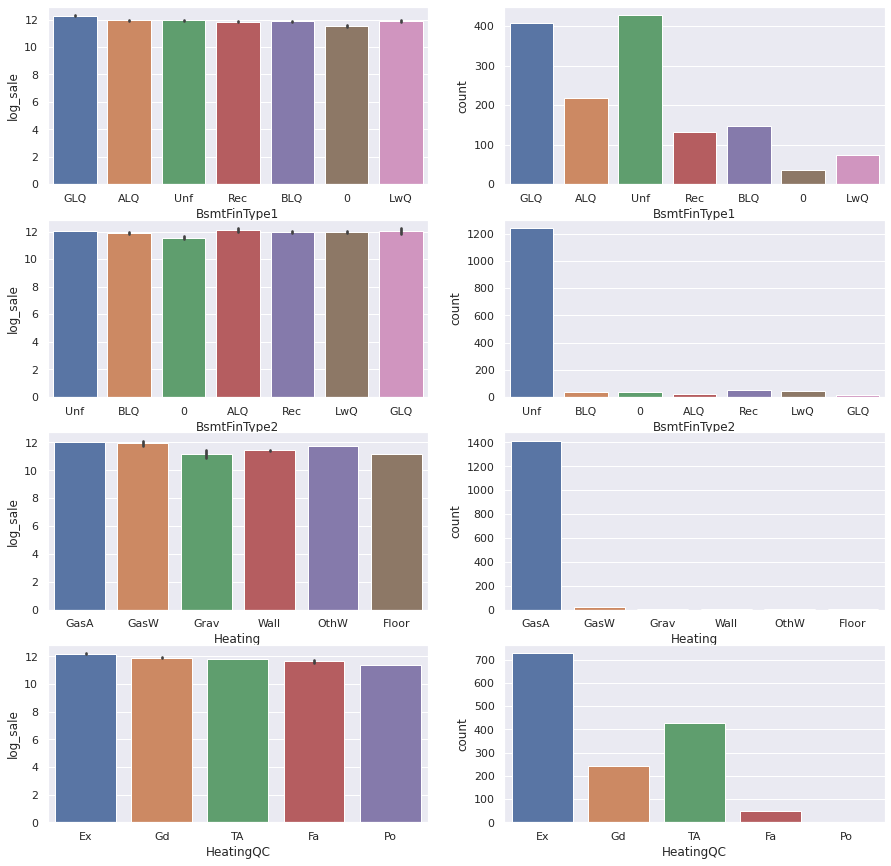

In [30]:
f, axes = plt.subplots(4, 2,figsize = (15,15))
sns.barplot(  x=data['BsmtFinType1'], y= data['log_sale'] , ax=axes[0,0])
sns.countplot(  x=data['BsmtFinType1'],  ax=axes[0,1])
sns.barplot(  x=data['BsmtFinType2'], y= data['log_sale'] , ax=axes[1,0])
sns.countplot(  x=data['BsmtFinType2'],  ax=axes[1,1])
sns.barplot(  x=data['Heating'], y= data['log_sale'] , ax=axes[2,0])
sns.countplot(  x=data['Heating'],  ax=axes[2,1])
sns.barplot(  x=data['HeatingQC'], y= data['log_sale'] , ax=axes[3,0])
sns.countplot(  x=data['HeatingQC'],  ax=axes[3,1])

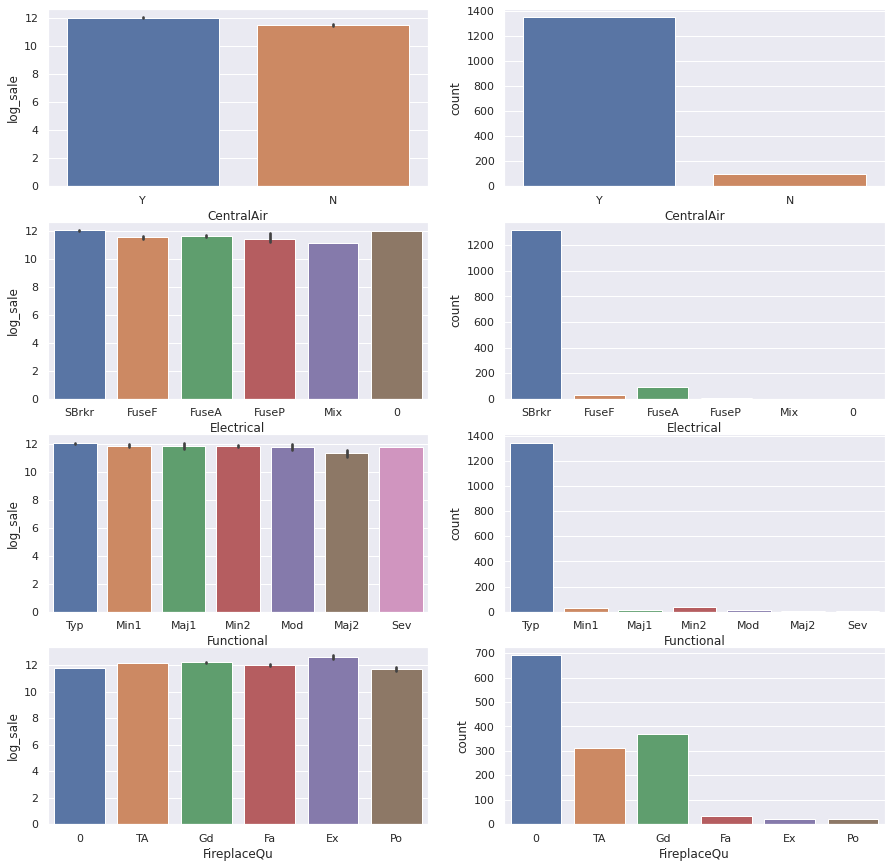

In [31]:
f, axes = plt.subplots(4, 2,figsize = (15,15))
sns.barplot(  x=data['CentralAir'], y= data['log_sale'] , ax=axes[0,0])
sns.countplot(  x=data['CentralAir'],  ax=axes[0,1])
sns.barplot(  x=data['Electrical'], y= data['log_sale'] , ax=axes[1,0])
sns.countplot(  x=data['Electrical'],  ax=axes[1,1])
sns.barplot(  x=data['Functional'], y= data['log_sale'] , ax=axes[2,0])
sns.countplot(  x=data['Functional'],  ax=axes[2,1])
sns.barplot(  x=data['FireplaceQu'], y= data['log_sale'] , ax=axes[3,0])
sns.countplot(  x=data['FireplaceQu'],  ax=axes[3,1])

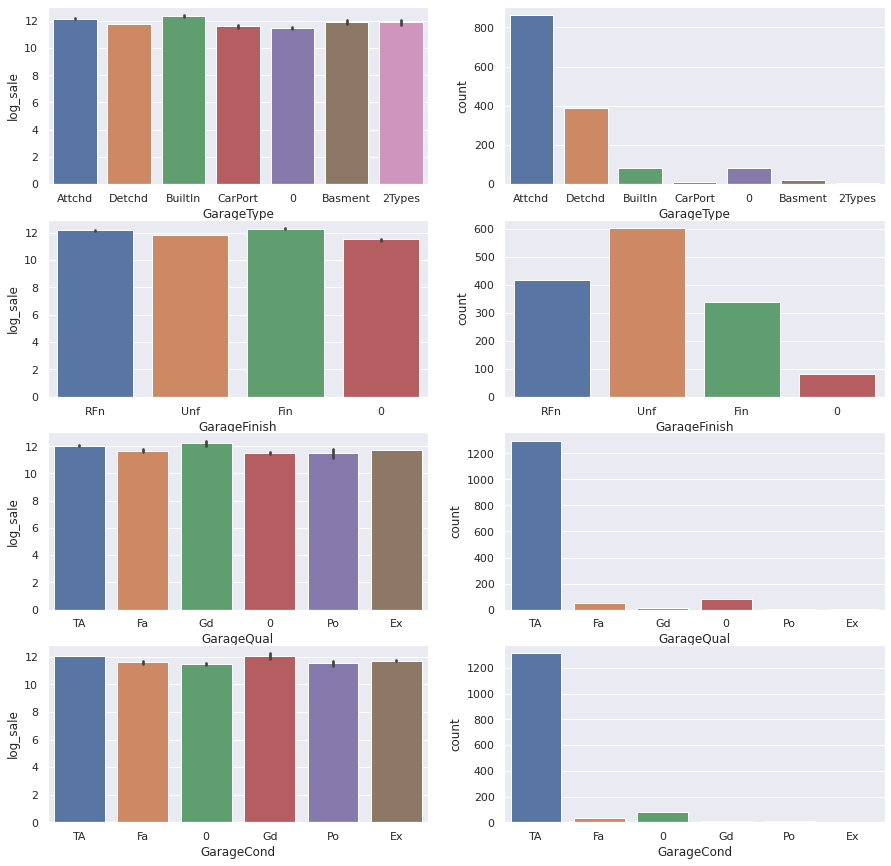

In [32]:
f, axes = plt.subplots(4, 2,figsize = (15,15))
sns.barplot(  x=data['GarageType'], y= data['log_sale'] , ax=axes[0,0])
sns.countplot(  x=data['GarageType'],  ax=axes[0,1])
sns.barplot(  x=data['GarageFinish'], y= data['log_sale'] , ax=axes[1,0])
sns.countplot(  x=data['GarageFinish'],  ax=axes[1,1])
sns.barplot(  x=data['GarageQual'], y= data['log_sale'] , ax=axes[2,0])
sns.countplot(  x=data['GarageQual'],  ax=axes[2,1])
sns.barplot(  x=data['GarageCond'], y= data['log_sale'] , ax=axes[3,0])
sns.countplot(  x=data['GarageCond'],  ax=axes[3,1])

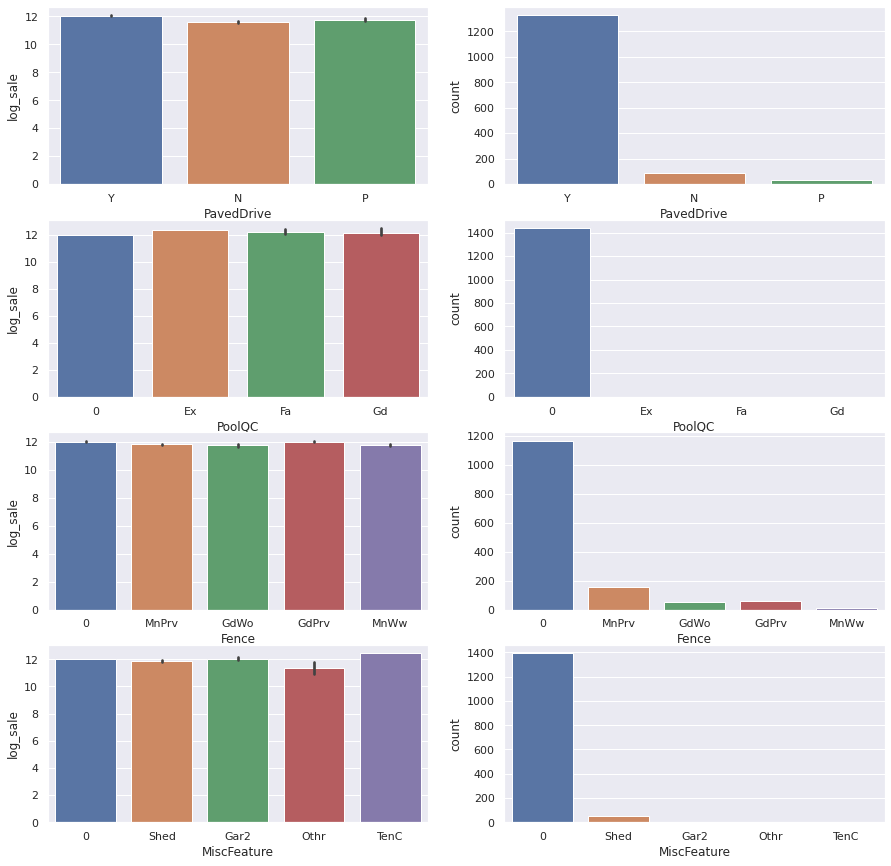

In [33]:
f, axes = plt.subplots(4, 2,figsize = (15,15))
sns.barplot(  x=data['PavedDrive'], y= data['log_sale'] , ax=axes[0,0])
sns.countplot(  x=data['PavedDrive'],  ax=axes[0,1])
sns.barplot(  x=data['PoolQC'], y= data['log_sale'] , ax=axes[1,0])
sns.countplot(  x=data['PoolQC'],  ax=axes[1,1])
sns.barplot(  x=data['Fence'], y= data['log_sale'] , ax=axes[2,0])
sns.countplot(  x=data['Fence'],  ax=axes[2,1])
sns.barplot(  x=data['MiscFeature'], y= data['log_sale'] , ax=axes[3,0])
sns.countplot(  x=data['MiscFeature'],  ax=axes[3,1])

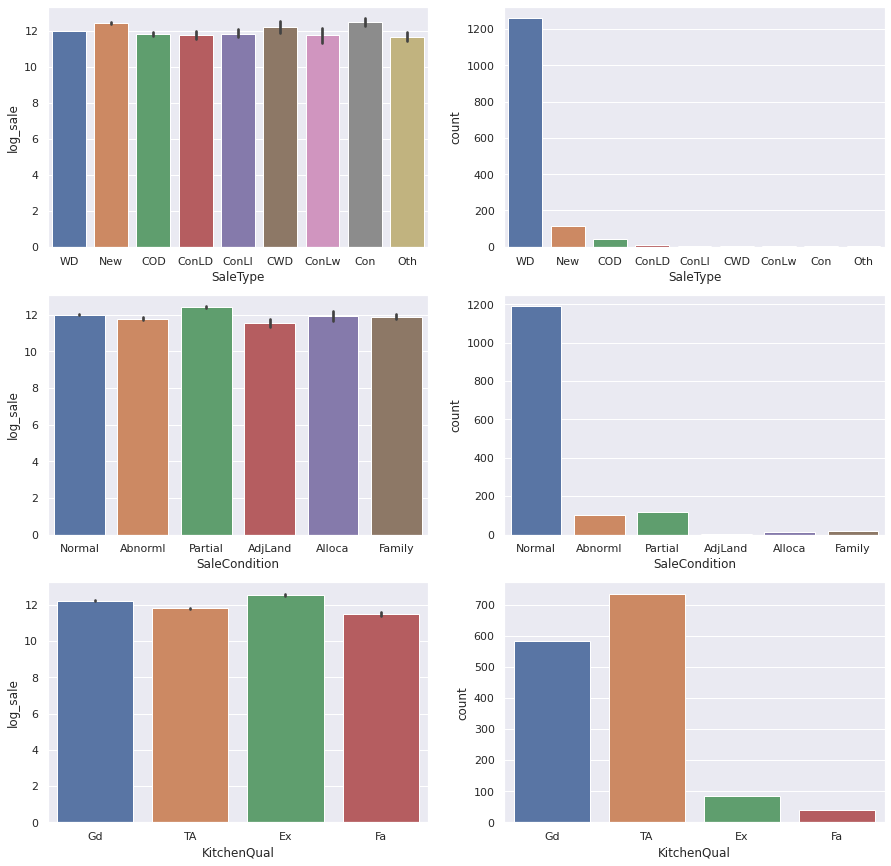

In [34]:
f, axes = plt.subplots(3, 2,figsize = (15,15))
sns.barplot(  x=data['SaleType'], y= data['log_sale'] , ax=axes[0,0])
sns.countplot(  x=data['SaleType'],  ax=axes[0,1])
sns.barplot(  x=data['SaleCondition'], y= data['log_sale'] , ax=axes[1,0])
sns.countplot(  x=data['SaleCondition'],  ax=axes[1,1])
sns.barplot(  x=data['KitchenQual'], y= data['log_sale'] , ax=axes[2,0])
sns.countplot(  x=data['KitchenQual'],  ax=axes[2,1])



In [35]:
#handle dummy variables
data=pd.get_dummies(data,drop_first=True)


In [36]:
#convert all data to float to overcome any further problems in building models
data=data.astype('float')
data.select_dtypes(include=['float'])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1916.0,1970.0,0.0,216.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1456,1457.0,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1457,1458.0,70.0,66.0,9042.0,7.0,8.0,1941.0,2006.0,0.0,275.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1458,1459.0,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [37]:
#view column names after dummy variables handling
data.columns.values

array(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'log_sale', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave',
       'Alley_Grvl', 'Alley_Pave', 'LotShape_IR2', 'LotShape_IR3',
       'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac',
       'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside',
       'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste',
   

In [38]:
#define independent variables and target variable for model building, training and testing
#input and targets
inputs=data[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave',
       'Alley_Grvl', 'Alley_Pave', 'LotShape_IR2', 'LotShape_IR3',
       'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac',
       'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside',
       'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'Condition1_Feedr', 'Condition1_Norm',
       'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe',
       'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn',
       'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA',
       'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn',
       'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Unf',
       'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
       'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc',
       'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone',
       'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior1st_WdShing', 'Exterior2nd_AsphShn',
       'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock',
       'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard',
       'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 'Exterior2nd_Other',
       'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco',
       'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng',
       'Exterior2nd_Wd Shng', 'MasVnrType_BrkCmn', 'MasVnrType_BrkFace',
       'MasVnrType_None', 'MasVnrType_Stone', 'ExterQual_Fa',
       'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Fa', 'ExterCond_Gd',
       'ExterCond_Po', 'ExterCond_TA', 'Foundation_CBlock',
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'BsmtQual_Ex', 'BsmtQual_Fa', 'BsmtQual_Gd',
       'BsmtQual_TA', 'BsmtCond_Fa', 'BsmtCond_Gd', 'BsmtCond_Po',
       'BsmtCond_TA', 'BsmtExposure_Av', 'BsmtExposure_Gd',
       'BsmtExposure_Mn', 'BsmtExposure_No', 'BsmtFinType1_ALQ',
       'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ',
       'BsmtFinType1_Rec', 'BsmtFinType1_Unf', 'BsmtFinType2_ALQ',
       'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ',
       'BsmtFinType2_Rec', 'BsmtFinType2_Unf', 'Heating_GasA',
       'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall',
       'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA',
       'CentralAir_Y', 'Electrical_FuseA', 'Electrical_FuseF',
       'Electrical_FuseP', 'Electrical_Mix', 'Electrical_SBrkr',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'Functional_Maj2', 'Functional_Min1', 'Functional_Min2',
       'Functional_Mod', 'Functional_Sev', 'Functional_Typ',
       'FireplaceQu_Ex', 'FireplaceQu_Fa', 'FireplaceQu_Gd',
       'FireplaceQu_Po', 'FireplaceQu_TA', 'GarageType_2Types',
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_Fin',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageQual_Ex',
       'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA',
       'GarageCond_Ex', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po',
       'GarageCond_TA', 'PavedDrive_P', 'PavedDrive_Y', 'PoolQC_Ex',
       'PoolQC_Fa', 'PoolQC_Gd', 'Fence_GdPrv', 'Fence_GdWo',
       'Fence_MnPrv', 'Fence_MnWw', 'MiscFeature_Gar2',
       'MiscFeature_Othr', 'MiscFeature_Shed', 'MiscFeature_TenC',
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial']]
target=data['log_sale']

Scaling input

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

Train and Test Split

In [40]:
#training set is 0.7 and testing is 0.3 that are selected randomly
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.3)

Ridge regression

In [41]:
#ridge model building
#set different alpha values and test each value 
#get best estimator using grid search
#shows best estimator score
#save r2 score and mean square of the best estimator on train and test sets
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
r_reg = Ridge()
parameters={'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20,30,40,50,60,70]}
rreg_gv=GridSearchCV(r_reg,parameters,scoring='neg_mean_squared_error',return_train_score=True)
rreg_gv.fit(x_train,y_train)
print('best alpha',rreg_gv.best_params_)
print('best neg mean sq err',rreg_gv.best_score_)
ridge_train_pred=rreg_gv.best_estimator_.predict(x_train)
ridge_test_pred=rreg_gv.best_estimator_.predict(x_test)
model_scores=pd.DataFrame()
model_scores["titles"]=["mean_train","mean_test","r2_train","r2_test"]
model_scores["ridge_model"]=[mean_squared_error(y_train, ridge_train_pred),
                          mean_squared_error(y_test, ridge_test_pred),
                          r2_score(y_train, ridge_train_pred),
                          r2_score(y_test, ridge_test_pred)]
model_scores

best alpha {'alpha': 20}
best neg mean sq err -0.01758324935160352


,titles,ridge_model
0,mean_train,0.012263
1,mean_test,0.013947
2,r2_train,0.920025
3,r2_test,0.892361


In [42]:
#repeat ridge model again and save scores for both training and testing sets
alpha_par=[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20,30,40,50,60,70]

r2_train,r2_test,Mse_train,Mse_test=[],[],[],[]
for alpha in alpha_par:
    l_model=Ridge(alpha=alpha)
    l_model.fit(x_train,y_train)
    tr_pred=l_model.predict(x_train)
    ts_pred=l_model.predict(x_test)
    r2_train.append(r2_score(y_train,tr_pred))
    r2_test.append(r2_score(y_test,ts_pred))
    Mse_train.append(mean_squared_error(y_train,tr_pred))
    Mse_test.append(mean_squared_error(y_test,ts_pred))

ridge_scores=pd.DataFrame({'alpha':alpha_par,
                                   'r2_train':r2_train,
                                   'r2_test':r2_test,
                                   'Mse_train':Mse_train,
                                   'Mse_test':Mse_test})

ridge_scores

,alpha,r2_train,r2_test,Mse_train,Mse_test
0,1.000000e-15,0.943280,-190812.004895,0.008697,24724.708550
1,1.000000e-10,0.943280,0.812120,0.008697,0.024345
2,1.000000e-08,0.943280,0.812126,0.008697,0.024344
3,1.000000e-04,0.943280,0.812329,0.008697,0.024318
4,1.000000e-03,0.943279,0.814101,0.008697,0.024088
5,1.000000e-02,0.943178,0.827795,0.008713,0.022314
6,1.000000e+00,0.936412,0.879375,0.009750,0.015630
7,5.000000e+00,0.929379,0.887092,0.010829,0.014630
8,1.000000e+01,0.925162,0.889982,0.011475,0.014256
9,2.000000e+01,0.920025,0.892361,0.012263,0.013947


In [43]:
#upload all coefficients and their values in dataframe
coeffs_df=pd.DataFrame()
coeffs_df['coeff_title']=inputs.columns.values
coeffs_df['ridge_coeff']=rreg_gv.best_estimator_.coef_.round(3)

In [44]:
#arrange ridge coeffients from greatest to smallest
coeffs_df= coeffs_df.sort_values(by=['ridge_coeff'],ascending=False)
coeffs_df

,coeff_title,ridge_coeff
61,Neighborhood_Crawfor,0.072
196,CentralAir_Y,0.060
259,SaleCondition_Normal,0.059
3,OverallQual,0.055
4,OverallCond,0.055
...,...,...
103,HouseStyle_2Story,-0.031
130,Exterior1st_Wd Sdng,-0.032
65,Neighborhood_MeadowV,-0.035
62,Neighborhood_Edwards,-0.044


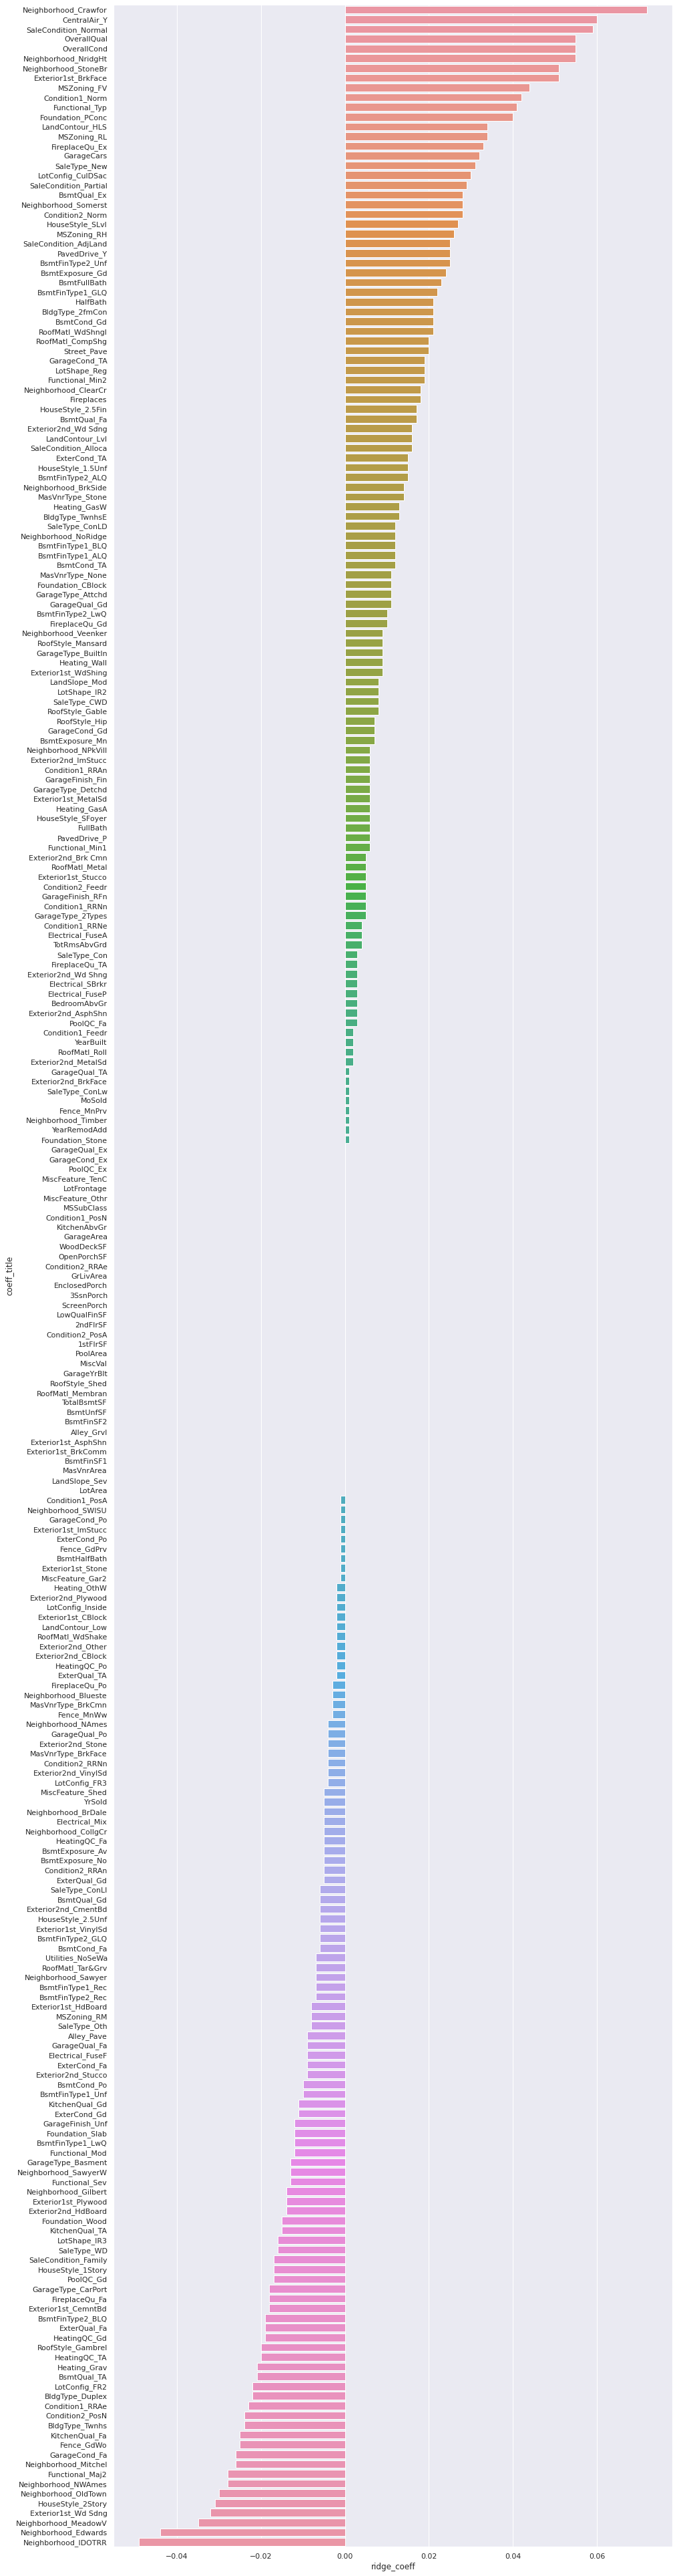

In [45]:
#plot the coefficients magntitudes
f, axes = plt.subplots(figsize = (15,70))
sns.barplot(x=coeffs_df["ridge_coeff"],y=coeffs_df['coeff_title'])

Lasso Regression

In [46]:
#lasso model building
#set different alpha values and test each value 
#get best estimator using grid search
#shows best estimator score
#save r2 score and mean square of the best estimator on train and test sets
from sklearn.linear_model import Lasso
las_reg=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3, 1e-2,1e-1,1,5,10]}
lasso_gv=GridSearchCV(las_reg,parameters,scoring='neg_mean_squared_error',return_train_score=True)
lasso_gv.fit(x_train,y_train)
print(lasso_gv.best_params_)
print(lasso_gv.best_score_)
lasso_train_pred=lasso_gv.best_estimator_.predict(x_train)
lasso_test_pred=lasso_gv.best_estimator_.predict(x_test)
model_scores["lasso_model"]=[mean_squared_error(y_train, lasso_train_pred),
                          mean_squared_error(y_test, lasso_test_pred),
                          r2_score(y_train, lasso_train_pred),
                          r2_score(y_test, lasso_test_pred)]
model_scores

{'alpha': 0.001}
-0.017324331849869326


,titles,ridge_model,lasso_model
0,mean_train,0.012263,0.013734
1,mean_test,0.013947,0.013287
2,r2_train,0.920025,0.910429
3,r2_test,0.892361,0.897457


In [47]:
#repeat the lasso model building using same ranges of alpha and save the scores
alpha_par=[1e-15,1e-10,1e-8,1e-4,1e-3, 1e-2,1e-1,1,5,10]
r2_train,r2_test,Mse_train,Mse_test=[],[],[],[]
for alpha in alpha_par:
    l_model=Lasso(alpha=alpha)
    l_model.fit(x_train,y_train)
    tr_pred=l_model.predict(x_train)
    ts_pred=l_model.predict(x_test)
    r2_train.append(r2_score(y_train,tr_pred))
    r2_test.append(r2_score(y_test,ts_pred))
    Mse_train.append(mean_squared_error(y_train,tr_pred))
    Mse_test.append(mean_squared_error(y_test,ts_pred))

lasso_scores=pd.DataFrame({'alpha':alpha_par,
                                   'r2_train':r2_train,
                                   'r2_test':r2_test,
                                   'Mse_train':Mse_train,
                                   'Mse_test':Mse_test})
lasso_scores

,alpha,r2_train,r2_test,Mse_train,Mse_test
0,1.000000e-15,0.943260,0.814449,0.008700,0.024043
1,1.000000e-10,0.943260,0.814449,0.008700,0.024043
2,1.000000e-08,0.943260,0.814495,0.008700,0.024037
3,1.000000e-04,0.936026,0.887624,0.009809,0.014561
4,1.000000e-03,0.910429,0.897457,0.013734,0.013287
5,1.000000e-02,0.871522,0.872893,0.019700,0.016470
6,1.000000e-01,0.821606,0.829701,0.027354,0.022067
7,1.000000e+00,0.798302,0.797230,0.030927,0.026274
8,5.000000e+00,0.725360,0.709733,0.042112,0.037612
9,1.000000e+01,0.708084,0.692655,0.044761,0.039824


In [48]:
#save the lasso coefficients of best estimator to the dataframe
coeffs_df["lasso_coeff"]=lasso_gv.best_estimator_.coef_.round(3)
coeffs_df

,coeff_title,ridge_coeff,lasso_coeff
61,Neighborhood_Crawfor,0.072,-0.000
196,CentralAir_Y,0.060,-0.000
259,SaleCondition_Normal,0.059,0.000
3,OverallQual,0.055,0.060
4,OverallCond,0.055,0.058
...,...,...,...
103,HouseStyle_2Story,-0.031,0.000
130,Exterior1st_Wd Sdng,-0.032,0.000
65,Neighborhood_MeadowV,-0.035,-0.000
62,Neighborhood_Edwards,-0.044,0.059


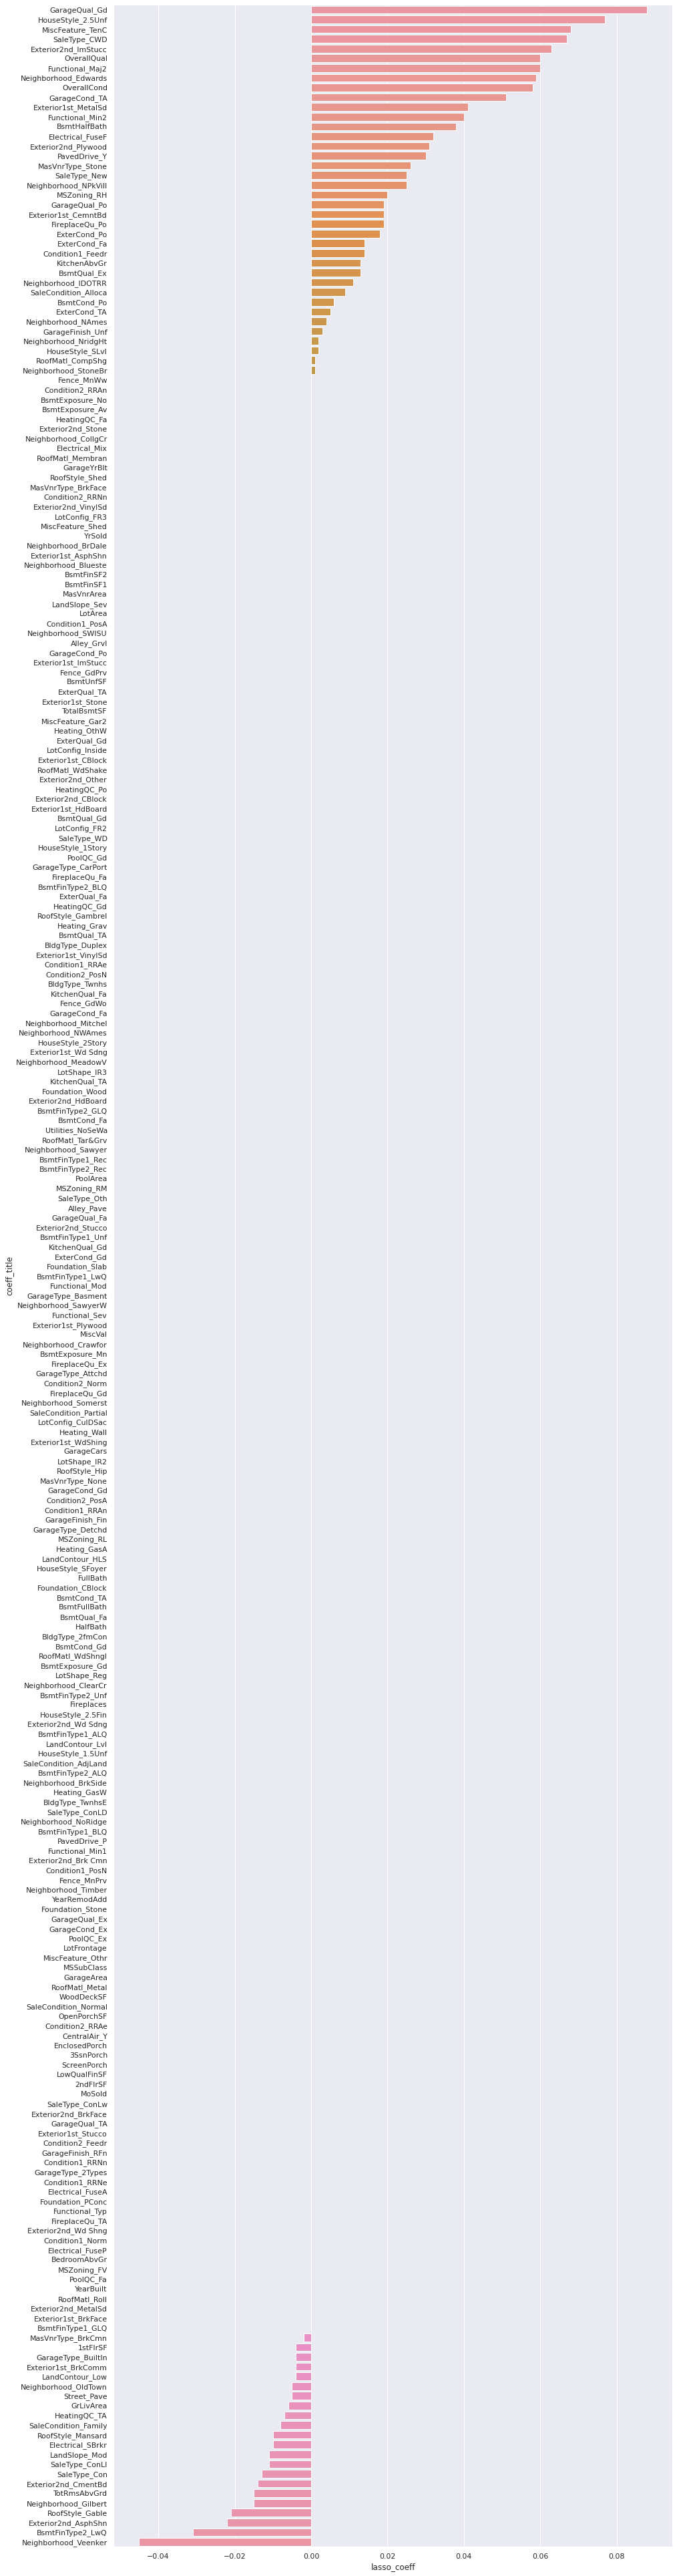

In [49]:
coeffs_df=coeffs_df.sort_values(by=['lasso_coeff'],ascending=False)
f, axes = plt.subplots(figsize = (15,70))
sns.barplot(x=coeffs_df['lasso_coeff'],y=coeffs_df['coeff_title'])

In [50]:
#coefficients used in Lasso where coefficient not equal zero
coeff_used = np.sum(lasso_gv.best_estimator_.coef_!=0)
coeff_used

78

In [51]:
#get top 10 maximum coeffiecients in ridge regression using best alpha 20
coeffs_df.sort_values(by='ridge_coeff', ascending=False).head(10)

,coeff_title,ridge_coeff,lasso_coeff
61,Neighborhood_Crawfor,0.072,-0.000
196,CentralAir_Y,0.060,-0.000
259,SaleCondition_Normal,0.059,0.000
71,Neighborhood_NridgHt,0.055,0.002
3,OverallQual,0.055,0.060
4,OverallCond,0.055,0.058
77,Neighborhood_StoneBr,0.051,0.001
120,Exterior1st_BrkFace,0.051,-0.000
36,MSZoning_FV,0.044,0.000
81,Condition1_Norm,0.042,-0.000


In [52]:
#get top 10 maximum coeffiecients in lasso regression using best alpha 0.001
coeffs_df.sort_values(by='lasso_coeff', ascending=False).head(10)
#we will notice both results are the same

,coeff_title,ridge_coeff,lasso_coeff
227,GarageQual_Gd,0.011,0.088
102,HouseStyle_2.5Unf,-0.006,0.077
247,MiscFeature_TenC,0.000,0.068
248,SaleType_CWD,0.008,0.067
138,Exterior2nd_ImStucc,0.006,0.063
3,OverallQual,0.055,0.060
205,Functional_Maj2,-0.028,0.060
62,Neighborhood_Edwards,-0.044,0.059
4,OverallCond,0.055,0.058
234,GarageCond_TA,0.019,0.051


In [53]:
set1=set(coeffs_df.sort_values(by='ridge_coeff', ascending=False)['coeff_title'])
set2=set(coeffs_df.sort_values(by='lasso_coeff', ascending=False)['coeff_title'])
#here we get common max features in both regressions and take the best five
most_common_coeff=pd.Series(list(set1 & set2)).head(5)
most_common_coeff

0             MSZoning_RH
1         LandContour_Low
2    Neighborhood_OldTown
3     Exterior2nd_VinylSd
4     Exterior1st_CemntBd
dtype: object

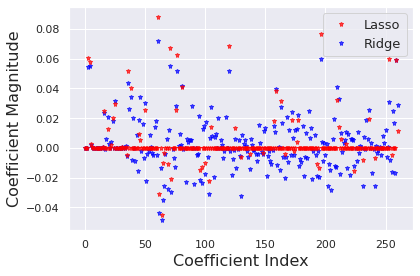

In [54]:
#plot lasso and ridge coefficients indexes and magnitudes
plt.plot(lasso_gv.best_estimator_.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label='Lasso',zorder=7) 
plt.plot(rreg_gv.best_estimator_.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='blue',label='Ridge',zorder=3) 
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13)
plt.tight_layout()
plt.show()

In [55]:
#here is an experiment three kinds of feature coefficients are tried to ridge and lasso regression
#using best alpha values that have gotten before
#then duplicate the alpha value and view models performance using r2 score and mean square error

In [56]:
#form new dataset using top 5 features extracted before
#this below line to use input features of lasso non zero coefficients
#inputs=data[list(set(coeffs_df[coeffs_df['lasso_coeff']!=0]['coeff_title']))]
#this below line to use input features of ridge non zero coefficients
inputs=data[list(set(coeffs_df[coeffs_df['ridge_coeff']!=0]['coeff_title']))]
#this below line to use input features of common top 10 features coefficients of both ridge and lasso
#inputs=data[most_common_coeff]
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.3)
#ridge regression with best alpha and top common features
ridge=Ridge(alpha=rreg_gv.best_params_['alpha'])
ridge.fit(x_train,y_train)
ridge_train_pred=ridge.predict(x_train)
ridge_test_pred=ridge.predict(x_test)
#recreate dataframe to store model scores
model_scores=pd.DataFrame()
model_scores["titles"]=["mean_train","mean_test","r2_train","r2_test"]
model_scores["ridge_model"]=[mean_squared_error(y_train, ridge_train_pred),
                          mean_squared_error(y_test, ridge_test_pred),
                          r2_score(y_train, ridge_train_pred),
                          r2_score(y_test, ridge_test_pred)]
#lasso regression with best alpha and top common features
lasso=Lasso(alpha=lasso_gv.best_params_['alpha'])
lasso.fit(x_train,y_train)
lasso_train_pred=lasso.predict(x_train)
lasso_test_pred=lasso.predict(x_test)
model_scores["lasso_model"]=[mean_squared_error(y_train, lasso_train_pred),
                          mean_squared_error(y_test, lasso_test_pred),
                          r2_score(y_train, lasso_train_pred),
                          r2_score(y_test, lasso_test_pred)]
#display r2 score and mean squared error for two models and with train and test scores
model_scores

,titles,ridge_model,lasso_model
0,mean_train,0.015129,0.016477
1,mean_test,0.023729,0.024050
2,r2_train,0.896009,0.886741
3,r2_test,0.839465,0.837292


In [57]:
#duplicate alpha experiment for both ridge and lasso regression
ridge=Ridge(alpha=rreg_gv.best_params_['alpha']*2)
ridge.fit(x_train,y_train)
ridge_train_pred=ridge.predict(x_train)
ridge_test_pred=ridge.predict(x_test)

model_scores=pd.DataFrame()
model_scores["titles"]=["mean_train","mean_test","r2_train","r2_test"]
model_scores["ridge_model"]=[mean_squared_error(y_train, ridge_train_pred),
                          mean_squared_error(y_test, ridge_test_pred),
                          r2_score(y_train, ridge_train_pred),
                          r2_score(y_test, ridge_test_pred)]
#lasso regression with best alpha
lasso=Lasso(alpha=lasso_gv.best_params_['alpha']*2)
lasso.fit(x_train,y_train)
lasso_train_pred=lasso.predict(x_train)
lasso_test_pred=lasso.predict(x_test)
model_scores["lasso_model"]=[mean_squared_error(y_train, lasso_train_pred),
                          mean_squared_error(y_test, lasso_test_pred),
                          r2_score(y_train, lasso_train_pred),
                          r2_score(y_test, lasso_test_pred)]
#display r2 score and mean squared error for two models and with train and test  after duplicate alpha values
model_scores
#we will notice the results still the same after duplicate alpha and use the same input feature
#we will notice that ridge non zero coefficient works better than lasso non zero and common 10 coefficients for both regressions


,titles,ridge_model,lasso_model
0,mean_train,0.016499,0.019372
1,mean_test,0.024304,0.025852
2,r2_train,0.886592,0.866843
3,r2_test,0.835574,0.825100
